COMP 4353 Data Mining  
TEAM KNN  
Medina Colic  
Lilian Erue  
Geraldo Braho  
Ovadan Herzetgulyeva  
5/5/2017

## Member Contributions

* Medina - Step 1, 2, 10
* Lilian - Step 3, 6, 9
* Geraldo - Step 5, 8
* Ovadan - Step 4, 7


## Project: Predictive Model

# <center> Blood Transfusion Service Center </center>

## Problem

This is a workflow for building a predictive model (classification) to determine whether the donors donated blood during the certain time.
The order of this listing corresponds to the order of numerals along the rows of 
the database.

* R (Recency - months since last donation),
* F (Frequency - total number of donation),
* M (Monetary - total blood donated in c.c.),
* T (Time - months since first donation), and
* a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

## Step 1 - Data Information and Descriptive Statistics

In [1]:
#Import libraries and packages
import pandas
import numpy as np
import scipy
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataSet = pandas.read_csv("KNN_PredictiveModel.csv");
dataSet.columns = [['recency', 'frequency', 'monetary_blood', 'time', 'class']]

In [3]:
dataset = dataSet.drop(dataSet.index[0])

In [4]:
dataset.shape

(747, 5)

In [5]:
dataset.head(n=10)

,recency,frequency,monetary_blood,time,class
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1
10,4,23,5750,58,0


In [6]:
dataset.describe()

,recency,frequency,monetary_blood,time,class
count,747.000000,747.000000,747.000000,747.000000,747.000000
mean,9.516734,5.455154,1363.788487,34.196787,0.236948
std,8.096150,5.611321,1402.830334,24.281086,0.425495
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,46.000000,11500.000000,98.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 1 to 747
Data columns (total 5 columns):
recency           747 non-null int64
frequency         747 non-null int64
monetary_blood    747 non-null int64
time              747 non-null int64
class             747 non-null int64
dtypes: int64(5)
memory usage: 35.0 KB


In [8]:
# class distribution
print(dataset.groupby('class').size())

class
0    570
1    177
dtype: int64


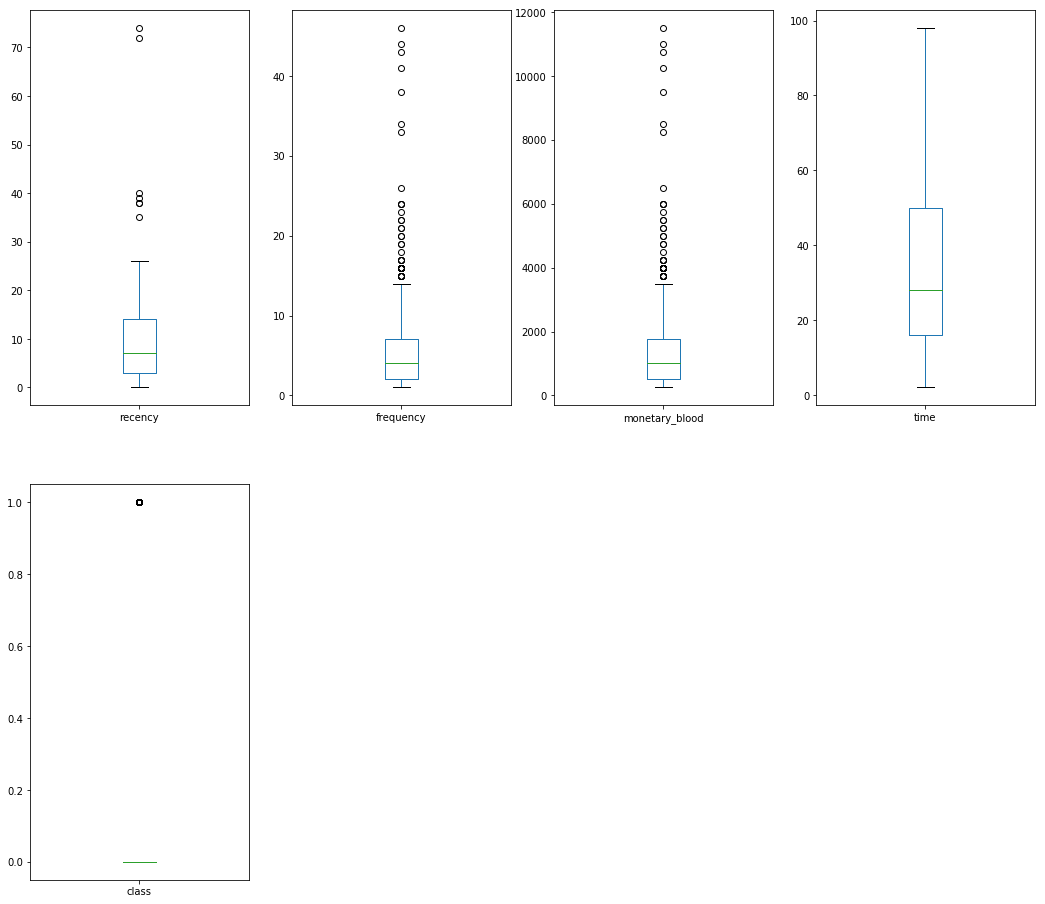

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(18,16))
plt.show()

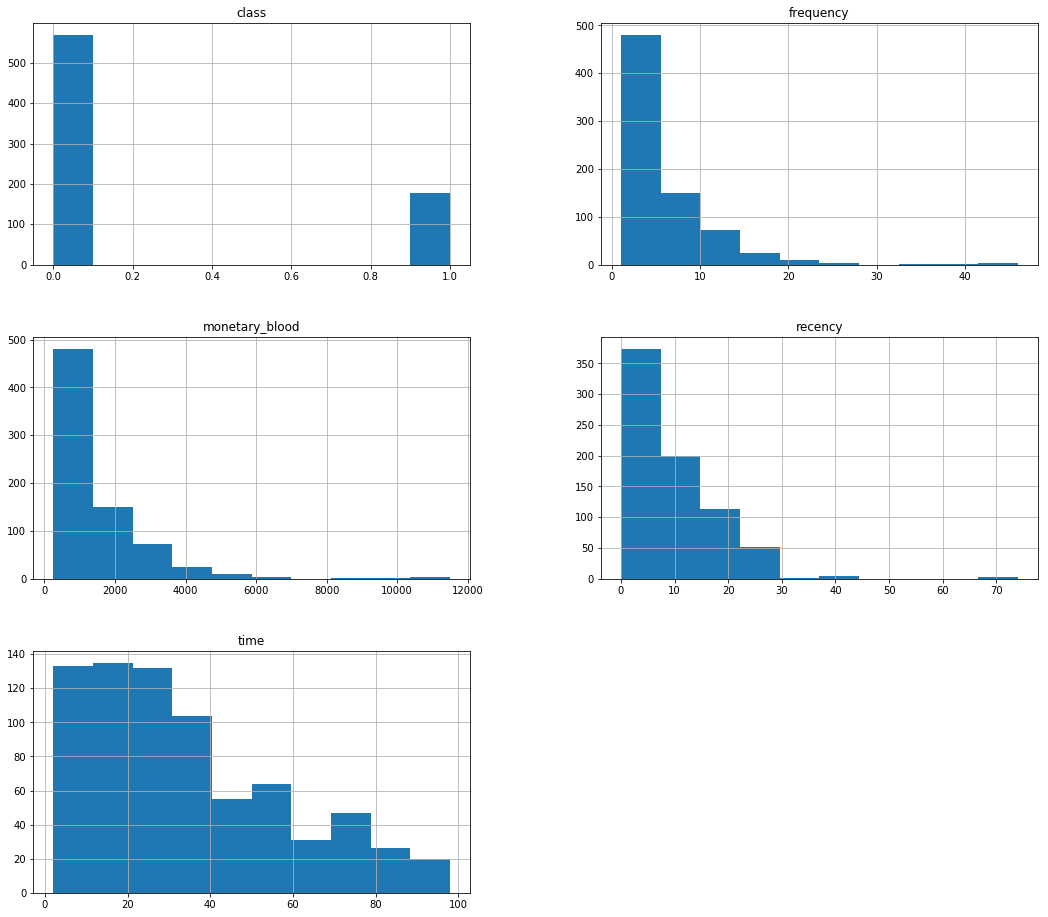

In [10]:

# histograms
dataset.hist(figsize=(18,16))
plt.show()

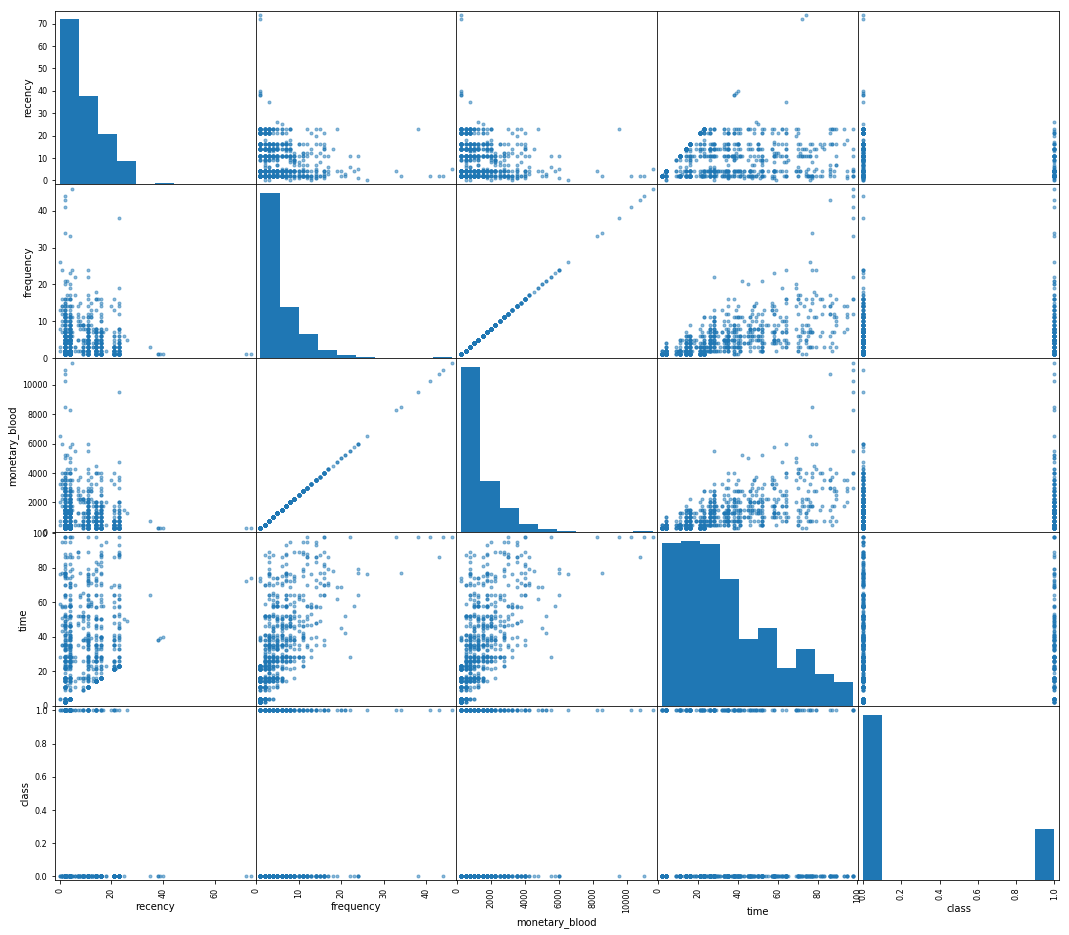

In [11]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(18,16))
plt.show()

## Step 2 - Train Test Split

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
pandas.DataFrame(X_train).describe()

,0,1,2,3
count,522.000000,522.000000,522.000000,522.000000
mean,9.515326,5.363985,1340.996169,34.339080
std,7.885746,5.529339,1382.334864,24.873615
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,8.500000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,46.000000,11500.000000,98.000000


In [14]:
pandas.DataFrame(X_test).describe()

,0,1,2,3
count,225.000000,225.000000,225.000000,225.000000
mean,9.520000,5.666667,1416.666667,33.866667
std,8.582624,5.804093,1451.023346,22.897676
min,0.000000,1.000000,250.000000,2.000000
25%,4.000000,2.000000,500.000000,15.000000
50%,5.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.000000
max,72.000000,41.000000,10250.000000,98.000000


In [15]:
pandas.DataFrame(Y_train).describe()

,0
count,522.000000
mean,0.222222
std,0.416139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
pandas.DataFrame(Y_test).describe()

,0
count,225.000000
mean,0.271111
std,0.445524
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


* Review the descriptive statistics of input output columns in Train, Test and original Full (before the splitting operation) datasets and compare them to each other.
* Are they similar or not? Do you think Train and Test dataset are representative of the Full datasets? 
* Why ?

Descriptive statistics of full data set is very similar to the average of train and test data set descriptive statistics. Based on the statistics generated, I do think that the train and test data sets are good representatives of the full data set.

## Step 3 -  Analysis of the Output Column

In [17]:
scipy.stats.iqr(Y_train)

0.0

In [18]:
scipy.stats.iqr(Y_test)

1.0

In [19]:
np.amax(Y_train) - np.amin(Y_train)

1

In [20]:
np.amax(Y_test) - np.amin(Y_test)

1

* Is there a class imbalance problem? 
(check if there is big difference between the number of distinct values in your categorical output column)

Yes, there is a big class imbalance problem (570 (not donated) - 177 (donated)). This can be very bad, because our model can see our data, and since majority of it is 'not donated', it can predict for the new value 'not donated' as well. There are  several possible ways to resolve this issue, we could work on collecting more data, or resampling the current set, generating artifical data based on the existing data set and some other possible approaches you can think of.

## Step 4 - Scale Training and Test dataset

In [21]:
train_scaler = MinMaxScaler()
train_scaled = pandas.DataFrame(train_scaler.fit_transform(X_train))

/Users/Medina/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [22]:
train_scaled.describe()

,0,1,2,3
count,522.000000,522.000000,522.000000,522.000000
mean,0.128585,0.096977,0.096977,0.336865
std,0.106564,0.122874,0.122874,0.259100
min,0.000000,0.000000,0.000000,0.000000
25%,0.027027,0.022222,0.022222,0.145833
50%,0.114865,0.066667,0.066667,0.270833
75%,0.189189,0.133333,0.133333,0.500000
max,1.000000,1.000000,1.000000,1.000000


In [23]:
test_scaler = MinMaxScaler()
test_scaled = pandas.DataFrame(test_scaler.fit_transform(X_test))

In [24]:
test_scaled.describe()

,0,1,2,3
count,225.000000,225.000000,225.000000,225.000000
mean,0.132222,0.116667,0.116667,0.331944
std,0.119203,0.145102,0.145102,0.238517
min,0.000000,0.000000,0.000000,0.000000
25%,0.055556,0.025000,0.025000,0.135417
50%,0.069444,0.075000,0.075000,0.270833
75%,0.194444,0.150000,0.150000,0.489583
max,1.000000,1.000000,1.000000,1.000000


## Step 5 - Build Predictive Model

In [25]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [26]:
# Introduce Algorithms
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.779790 (0.044200)


In [27]:
# Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

## Step 6 - Model Predictions on Training Dataset

In [28]:
# Make predictions on train dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(train_scaled)
# print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))

[[406   0]
 [116   0]]


## Step 7 - Model Predictions on Test Dataset

In [29]:
# Make predictions on test dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
# print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

[[154  10]
 [ 43  18]]


## Step 8 - Model Performance

In [30]:
# Training Performance
# Make predictions on train dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(train_scaled)
print(accuracy_score(Y_train, predictions))
# print(classification_report(Y_train, predictions))

0.777777777778


In [31]:
# Testing Performance
# Make predictions on test dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
# print(classification_report(Y_test, predictions))

0.764444444444


* Which one (Training or Testing performance) is better, is there an overfitting case, why ?.
* Would you deploy (Productionize) this model for using in actual usage in your business system? Why?

Currently, Training performance is better. I wouldn't say that there is overfitting case, because overfitting usually occurs when there is complex model deployed (with various and multiple parameters). The reason behind low performance of our model might be insuficcient number of data instances, and imbalanced classes. 

In order to determined if I would productionize this model, I would have to scale it on the biger data set. And to understand the real behavior and real execution of the performance, I would have to tweek existing parameters and maybe introduce the new ones for a closer statistical fit. With the current output, on this data set I would not productionize this model.

## Step 9 - Update the Model

In [32]:
###### STEP 5 ##############
# Update the model         #
# parameters and re-train  #
# the model.               #
###########################

# Introduce Algorithms
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=40, algorithm='ball_tree', leaf_size=50)))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.789405 (0.049755)


In [33]:
# Make predictions on train dataset
knn = KNeighborsClassifier(n_neighbors=40, algorithm='ball_tree', leaf_size=50)
knn.fit(X_train, Y_train)
predictions = knn.predict(train_scaled)
# print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
# print(classification_report(Y_train, predictions))

[[406   0]
 [116   0]]


In [34]:
# Make predictions on test dataset
knn = KNeighborsClassifier(n_neighbors=40, algorithm='ball_tree', leaf_size=50)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
# print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
# print(classification_report(Y_test, predictions))

[[164   0]
 [ 61   0]]


In [35]:
# Training Performance
# Make predictions on train dataset
knn = KNeighborsClassifier(n_neighbors=40, algorithm='ball_tree', leaf_size=50)
knn.fit(X_train, Y_train)
predictions = knn.predict(train_scaled)
print(accuracy_score(Y_train, predictions))
# print(confusion_matrix(Y_train, predictions))
# print(classification_report(Y_train, predictions))

0.777777777778


In [36]:
# Testing Performance
# Make predictions on test dataset
knn = KNeighborsClassifier(n_neighbors=40, algorithm='ball_tree', leaf_size=50)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
# print(confusion_matrix(Y_test, predictions))
# print(classification_report(Y_test, predictions))

0.728888888889


* Did you get a better performance on Training or Test set?
* Explain why the new model performs better or worse than the former model.

Again, we got the better performance on the Training set.

And we go the same performance as previously. The reason for so could be that we didn't change the right parameters, or that we didn't change them enough to effect the performance of the model on the current data set. 

## Step 10 - Change the Error Metric

In [37]:
# Training Performance
# Make predictions on train dataset
knn = KNeighborsClassifier(n_neighbors=40, algorithm='ball_tree', leaf_size=50)
knn.fit(X_train, Y_train)
predictions = knn.predict(train_scaled)
print(accuracy_score(Y_train, predictions))
# print(confusion_matrix(Y_train, predictions))
print(roc_auc_score(Y_train, predictions))
print(classification_report(Y_train, predictions))

0.777777777778
0.5
             precision    recall  f1-score   support

          0       0.78      1.00      0.88       406
          1       0.00      0.00      0.00       116

avg / total       0.60      0.78      0.68       522



/Users/Medina/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
# Testing Performance
# Make predictions on test dataset
knn = KNeighborsClassifier(n_neighbors=40, algorithm='ball_tree', leaf_size=50)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(roc_auc_score(Y_test, predictions))
# print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.728888888889
0.5
             precision    recall  f1-score   support

          0       0.73      1.00      0.84       164
          1       0.00      0.00      0.00        61

avg / total       0.53      0.73      0.61       225



* Compare the results and explain which error metric is better for your modeling and why?

Neglecting the fact that we have a big class imbalance within our data set, the "AUC" error metric would the best one for our modeling. Because Area Under the ROC Curve is known as an error metric for binary classification. And since in our problem we have two classes, it is considered as binary classification as well. 

If we deploy one of the above mentioned methods for resolving the class imbalance issue, we could maybe see the better performance of our model.